In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, plot_roc_curve


In [4]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df = df[df["smoking_status"].str.contains("Unknown") == False]


In [6]:
df = df[df['gender'].str.contains('Other')==False]

In [7]:
df['ever_married']=df.ever_married.map({'Yes':0,'No':1})
df['Residence_type']=df.Residence_type.map({'Urban':0,'Rural':1})
df['work_type']=df.work_type.map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [8]:
df['gender']=df.gender.map({'Female':1,'Male':2})
df['smoking_status']=df.smoking_status.map({'never smoked':1,'formerly smoked':2,'smokes':3})


In [9]:
df['id'].drop

<bound method Series.drop of 0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5102    45010
5105    18234
5106    44873
5107    19723
5108    37544
Name: id, Length: 3565, dtype: int64>

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       2  67.0             0              1             0   
1     51676       1  61.0             0              0             0   
2     31112       2  80.0             0              1             0   
3     60182       1  49.0             0              0             0   
4      1665       1  79.0             1              0             0   
...     ...     ...   ...           ...            ...           ...   
5102  45010       1  57.0             0              0             0   
5105  18234       1  80.0             1              0             0   
5106  44873       1  81.0             0              0             0   
5107  19723       1  35.0             0              0             0   
5108  37544       2  51.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             0               0             228.69  36.6               2   
1             1               1             202.21   NaN               1   
2             0               1             105.92  32.5               1   
3             0               0             171.23  34.4               3   
4             1               1             174.12  24.0               1   
...         ...             ...                ...   ...             ...   
5102          0               1              77.93  21.7               1   
5105          0               0              83.75   NaN               1   
5106          1               0             125.20  40.0               1   
5107          1               1              82.99  30.6               1   
5108          0               1             166.29  25.6               2   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5102       0  
5105       0  
5106       0  
5107       0  
5108       0  

[3565 rows x 12 columns]

In [12]:
test_data=df[df['bmi'].isnull()]

In [13]:
test_data

id  gender   age  hypertension  heart_disease  ever_married  \
1     51676       1  61.0             0              0             0   
29    69160       2  59.0             0              0             0   
43     1845       1  63.0             0              0             0   
51    15102       2  78.0             1              0             0   
54     8752       1  63.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
5039  42007       2  41.0             0              0             1   
5048  28788       2  40.0             0              0             0   
5093  32235       1  45.0             1              0             0   
5099   7293       2  40.0             0              0             0   
5105  18234       1  80.0             1              0             0   

      work_type  Residence_type  avg_glucose_level  bmi  smoking_status  \
1             1               1             202.21  NaN               1   
29            0               1             211.78  NaN               2   
43            0               0              90.90  NaN               2   
51            0               0              75.32  NaN               2   
54            2               0             197.54  NaN               1   
...         ...             ...                ...  ...             ...   
5039          0               1              70.15  NaN               2   
5048          0               0             191.15  NaN               3   
5093          2               1              95.02  NaN               3   
5099          0               1              83.94  NaN               3   
5105          0               0              83.75  NaN               1   

      stroke  
1          1  
29         1  
43         1  
51         1  
54         1  
...      ...  
5039       0  
5048       0  
5093       0  
5099       0  
5105       0  

[140 rows x 12 columns]

In [14]:
df['gender'].value_counts()

1    2158
2    1407
Name: gender, dtype: int64

In [15]:
df['smoking_status'].value_counts()

1    1892
2     884
3     789
Name: smoking_status, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
df.shape

(3425, 12)

In [19]:
y_train = df['bmi']

In [20]:
y_train.shape

(3425,)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   int64  
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   int64  
 6   work_type          3425 non-null   int64  
 7   Residence_type     3425 non-null   int64  
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   int64  
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 347.9 KB


In [22]:
df['ever_married'].value_counts()

0    2599
1     826
Name: ever_married, dtype: int64

In [23]:
df['Residence_type'].value_counts()

0    1745
1    1680
Name: Residence_type, dtype: int64

In [24]:
df['work_type'].value_counts()

0    2200
1     629
2     514
3      68
4      14
Name: work_type, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   int64  
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   int64  
 6   work_type          3425 non-null   int64  
 7   Residence_type     3425 non-null   int64  
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   int64  
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 347.9 KB


In [26]:
X = df.loc[:, df.columns[(df.columns != 'bmi')]]
y = df.loc[:, 'bmi'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
X_test=test_data.drop('bmi',axis=1)

In [31]:
X_test

id  gender   age  hypertension  heart_disease  ever_married  \
1     51676       1  61.0             0              0             0   
29    69160       2  59.0             0              0             0   
43     1845       1  63.0             0              0             0   
51    15102       2  78.0             1              0             0   
54     8752       1  63.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
5039  42007       2  41.0             0              0             1   
5048  28788       2  40.0             0              0             0   
5093  32235       1  45.0             1              0             0   
5099   7293       2  40.0             0              0             0   
5105  18234       1  80.0             1              0             0   

      work_type  Residence_type  avg_glucose_level  smoking_status  stroke  
1             1               1             202.21               1       1  
29            0               1             211.78               2       1  
43            0               0              90.90               2       1  
51            0               0              75.32               2       1  
54            2               0             197.54               1       1  
...         ...             ...                ...             ...     ...  
5039          0               1              70.15               2       0  
5048          0               0             191.15               3       0  
5093          2               1              95.02               3       0  
5099          0               1              83.94               3       0  
5105          0               0              83.75               1       0  

[140 rows x 11 columns]

In [32]:
X_test.shape

(140, 11)

In [33]:
y_pred= lr.predict(X_test)

In [34]:
y_pred

array([31.80665989, 32.8429967 , 29.83423665, 31.9982719 , 31.12431257,
       32.85382129, 28.24200155, 31.33698428, 30.15710482, 29.45287993,
       32.00862801, 30.64659384, 29.01892132, 28.76430473, 28.61242651,
       31.95031383, 30.2761534 , 27.10651196, 28.66150298, 30.5308667 ,
       33.0057383 , 28.76723409, 29.98037121, 34.4861936 , 29.6647741 ,
       36.0120386 , 31.29805016, 31.20417956, 29.0270873 , 32.53763851,
       30.2217263 , 33.88292384, 30.69354589, 28.37235773, 29.76052994,
       27.39869738, 28.61591866, 28.27394608, 31.03944184, 31.68389325,
       33.67319552, 31.79057828, 29.73772551, 33.26395805, 33.23165411,
       30.25877366, 29.90980296, 31.3211573 , 31.11196824, 35.01061019,
       33.46503175, 34.71840044, 30.32517451, 31.20448782, 32.58291481,
       28.07806557, 28.99910855, 35.32260041, 32.52011595, 30.63064579,
       31.15406699, 33.73057188, 29.63298717, 33.15701721, 28.98357578,
       27.59481553, 32.5841002 , 27.98366919, 29.9380114 , 30.29

In [35]:
y_pred.shape

(140,)

In [36]:
test_data.loc[test_data.bmi.isnull(),'bmi'] = y_pred

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       2  67.0             0              1             0   
2     31112       2  80.0             0              1             0   
3     60182       1  49.0             0              0             0   
4      1665       1  79.0             1              0             0   
5     56669       2  81.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
5100  68398       2  82.0             1              0             0   
5102  45010       1  57.0             0              0             0   
5106  44873       1  81.0             0              0             0   
5107  19723       1  35.0             0              0             0   
5108  37544       2  51.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             0               0             228.69  36.6               2   
2             0               1             105.92  32.5               1   
3             0               0             171.23  34.4               3   
4             1               1             174.12  24.0               1   
5             0               0             186.21  29.0               2   
...         ...             ...                ...   ...             ...   
5100          1               1              71.97  28.3               1   
5102          0               1              77.93  21.7               1   
5106          1               0             125.20  40.0               1   
5107          1               1              82.99  30.6               1   
5108          0               1             166.29  25.6               2   

      stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5100       0  
5102       0  
5106       0  
5107       0  
5108       0  

[3425 rows x 12 columns]

In [38]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       2  67.0             0              1             0   
2     31112       2  80.0             0              1             0   
3     60182       1  49.0             0              0             0   
4      1665       1  79.0             1              0             0   
5     56669       2  81.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
5100  68398       2  82.0             1              0             0   
5102  45010       1  57.0             0              0             0   
5106  44873       1  81.0             0              0             0   
5107  19723       1  35.0             0              0             0   
5108  37544       2  51.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             0               0             228.69  36.6               2   
2             0               1             105.92  32.5               1   
3             0               0             171.23  34.4               3   
4             1               1             174.12  24.0               1   
5             0               0             186.21  29.0               2   
...         ...             ...                ...   ...             ...   
5100          1               1              71.97  28.3               1   
5102          0               1              77.93  21.7               1   
5106          1               0             125.20  40.0               1   
5107          1               1              82.99  30.6               1   
5108          0               1             166.29  25.6               2   

      stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5100       0  
5102       0  
5106       0  
5107       0  
5108       0  

[3425 rows x 12 columns]

In [41]:
df['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

In [42]:
X = df.loc[:, df.columns[(df.columns != 'stroke')]]
y = df.loc[:, 'stroke'].values

In [43]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0,stratify=y)

In [44]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([2271,  126], dtype=int64))

In [46]:
log_reg= LogisticRegression (C=1.0,
                            multi_class='ovr')

In [47]:
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [48]:
log_reg.score(X_train,y_train)

0.9478514810179391

In [49]:
log_reg.score(X_test,y_test)

0.9474708171206225

In [50]:
logreg = LogisticRegression()
# Entrenar el modelo sobre los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)

In [53]:
cm = metrics.confusion_matrix(y_test, predictions).ravel()
cm

array([974,   0,  54,   0], dtype=int64)

In [54]:
tn, fp, fn, tp = cm

In [57]:
specificity = tn / (tn + fp)

In [59]:
specificity 

1.0

In [60]:
sensitivity = tp/ (tp + fn)

In [61]:
sensitivity

0.0

In [62]:
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')

Training AUC: 0.8200953359473836


In [63]:
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Testing AUC: 0.8607308540573428


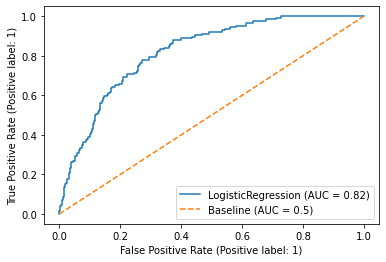

In [64]:
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Las metricas de ROC y AUC resultaron más eficientes para mi modelo